## Spike's blood glucose log

In [2]:
%pylab nbagg
import datetime 
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [11]:
entries = np.array([[datetime.datetime(year=2018, month=11, day=1,hour=8,minute=15),\
                    datetime.datetime(year=2018, month=11, day=1,hour=9,minute=30)],\
                    [220,96]])

#frist entry is "HI" or >40 so I replace it with 40 after the conversion below

In [12]:
# convert mg/dL to mmol/L
#x = 564
#x1 = (x/1e3)*1e1 #g/L
#x1= x1/.180156 #g/mmol*L div molar mass of glucose in mmol
#print(x1)

for i in range(len(entries[1])):
    entries[1][i] = (entries[1][i]/1e2)/.180156   
print(entries)

[[datetime.datetime(2018, 11, 1, 8, 15)
  datetime.datetime(2018, 11, 1, 9, 30)]
 [12.211638801927219 5.32871511356824]]


In [13]:
times = []
safe1 = []
ideal1 = []
ideal2 = []

for i in range(0,12):
    times.append(datetime.datetime(year=2018, month=10, day=31,hour=1))
    safe1.append(3.6)
    ideal1.append(16.7)
    ideal2.append(5.6) 

In [14]:
x = mdates.date2num(entries[0])

z4 = np.polyfit(x, entries[1], 2)
p4 = np.poly1d(z4)

/Users/ondrea/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


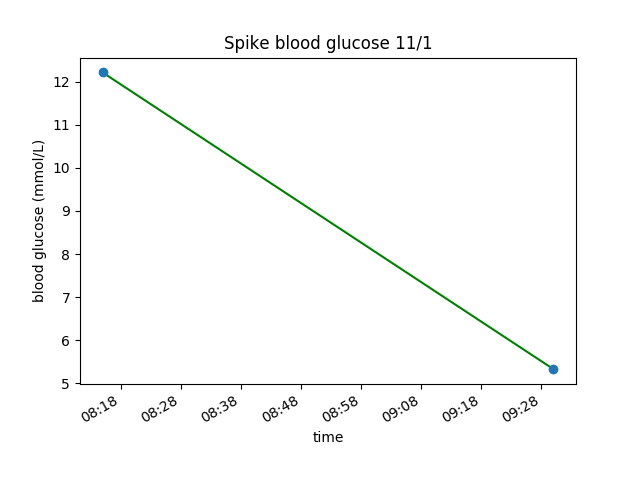

[ 736999.34375     736999.34481293  736999.34587585  736999.34693878
  736999.3480017   736999.34906463  736999.35012755  736999.35119048
  736999.3522534   736999.35331633  736999.35437925  736999.35544218
  736999.3565051   736999.35756803  736999.35863095  736999.35969388
  736999.3607568   736999.36181973  736999.36288265  736999.36394558
  736999.3650085   736999.36607143  736999.36713435  736999.36819728
  736999.3692602   736999.37032313  736999.37138605  736999.37244898
  736999.3735119   736999.37457483  736999.37563776  736999.37670068
  736999.37776361  736999.37882653  736999.37988946  736999.38095238
  736999.38201531  736999.38307823  736999.38414116  736999.38520408
  736999.38626701  736999.38732993  736999.38839286  736999.38945578
  736999.39051871  736999.39158163  736999.39264456  736999.39370748
  736999.39477041  736999.39583333]


In [21]:
#fig, ax = plt.subplots()
ifig=1;close(ifig);figure(ifig)
xx = np.linspace(x.min(), x.max(), 50)
print(xx)
dd = mdates.num2date(xx)
#dd1 = mdates.num2date(1,24)

#plt.plot(safe1,dd1,'r')
plt.plot(dd, p4(xx), '-g')
matplotlib.pyplot.plot_date(entries[0],entries[1])
plt.gcf().autofmt_xdate()
plt.title('Spike blood glucose 11/1')
plt.ylabel('blood glucose (mmol/L)')
plt.xlabel('time')
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('spike2.png')